# What Are we Measuring for Effect of Laguna?
  What are the metrics that we are measuring to understand the effect of Spectacles ? 


## List of Analyses 

- Engagement: Do Spectacles increase engagement?
    - For users with Spectacles
    - For users who consume other's Spectacles snaps
    - Metrics to measure: 
        - Snaps taken: Do Spectacles make users to snap more?
        - Time Spend: Do Spectacles make users to spent more time?
        - Snap Views: Do Spectecales snaps have more viewership than other snaps? 
- What % of Spectacles users are new/resurrected users?
- How long is the novelty effect?

In [58]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplot
import datetime
from statsmodels.stats.outliers_influence import summary_table
import scipy.stats as st
import sklearn.linear_model as lm
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from decimal import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import  sklearn
%matplotlib inline
plt.style.use('ggplot')
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h, h

In [50]:
querystring = """
select date_diff, sum(DIRECT_SNAP_CREATE) as count_snaps, count(user_id) as count_user 
from [sc-bq-gcs-billingonly:temp_messaging.zf_laguna_snaps]
where date_diff between -14 and 5 
group by 1
order by date_diff
"""

bqpid = "961149252533"
ladata = pd.io.gbq.read_gbq(querystring, bqpid)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 20 rows.

Total time taken 1.65 s.
Finished at 2016-11-18 18:28:23.


In [51]:
ladata.head()

,date_diff,count_snaps,count_user
0,-14,7400,2117
1,-13,8884,2227
2,-12,9650,2316
3,-11,6834,2107
4,-10,6280,2070


In [52]:
stats_ladata = mean_confidence_interval(ladata['count_snaps'], confidence=0.95)
print stats_ladata

(8834.0, 7187.1410901850977, 10480.858909814902, 1646.8589098149027)


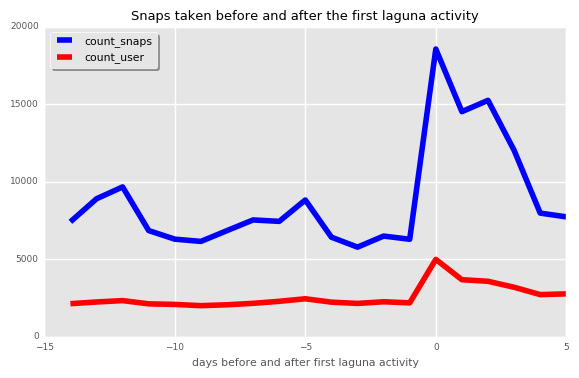

In [59]:
%matplotlib inline
#plot = plt.plot(andata['date'], andata['avg_l7'])
pyplot.plot(ladata['date_diff'], ladata['count_snaps'], '-b')
pyplot.plot(ladata['date_diff'], ladata['count_user'], '-r')
plt.rcParams.update({'font.size': 6.5})
pyplot.xlabel('days before and after first laguna activity')
#pyplot.ylabel('snaps taken')
pyplot.title('Snaps taken before and after the first laguna activity')
pyplot.legend(['count_snaps', 'count_user'],loc='upper left', shadow=True)

In [54]:
# TO DO
# 7-day moving average

In [55]:
# t-test
# To DO: Make this with parameter of dates
st.ttest_ind(ladata.loc[(ladata.date_diff > -6) & (ladata.date_diff < 0),'count_snaps'], ladata.loc[(ladata.date_diff > 0)  ,'count_snaps'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-2.840208115426242, pvalue=0.021804983804031397)

In [ ]:
# Measure the change in time spent